In [47]:
# mlp for binary classification

import pandas as pd
import seaborn as sns
import numpy as np
import pydot
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sn
from plotnine import *
#import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import load_model

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, cohen_kappa_score
from sklearn.utils.multiclass import unique_labels



#from tensorflow.keras.layers import advanced_activations

In [2]:
#load data 
dir_file1= "D:/ugarte/datos/datos ban 03 2019/"
datos = pd.read_csv("D:/ugarte/datos/datos ban 03 2019/datos032019.csv", header = None, encoding="ISO-8859-1")

dir_file2= "D:/ugarte/datos/datos ban 03 2019 adicionales/"
datos_add = pd.read_csv("D:/ugarte/datos/datos ban 03 2019 adicionales/datos_add_03_2019.csv", header= None, encoding="ISO-8859-1")

In [4]:
datos_add.head()

,0,1,2,3,4,5,6,7,8,9,...,517,518,519,520,521,522,523,524,525,526
0,Experimento-2017-03-06 22-41-24,0,0,NaN,NaN,NaN,NaN,-1.39562,-1.30664,-1.24937,...,0.456231,0.443879,0.432634,0.427515,0.433340,0.421868,0.379341,0.292351,0.147487,-0.068658
1,Experimento-2017-03-06 22-46-23,0,0,NaN,NaN,NaN,NaN,-1.42109,-1.36845,-1.32830,...,0.425723,0.409881,0.396079,0.397572,0.398486,0.379157,0.316693,0.193333,-0.008684,-0.307117
2,Experimento-2017-03-06 22-53-36,0,0,NaN,NaN,NaN,NaN,-1.54161,-1.42342,-1.34301,...,0.400387,0.386088,0.378870,0.386314,0.370911,0.341893,0.270430,0.140535,-0.063779,-0.358497
3,Experimento-2017-03-06 22-59-21,0,0,NaN,NaN,NaN,NaN,-1.53054,-1.42613,-1.35777,...,0.390679,0.378349,0.365595,0.367024,0.372483,0.351041,0.282968,0.149842,-0.066760,-0.385260
4,Experimento-2017-03-06 23-04-04,0,0,NaN,NaN,NaN,NaN,-1.57307,-1.44454,-1.36082,...,0.396107,0.382752,0.369996,0.373659,0.367087,0.341704,0.274615,0.149738,-0.049007,-0.337702


In [5]:
nfilas_datos_add = datos_add.shape[0]
print(nfilas_datos_add)
print(f'There are {datos_add.shape[0]} observations and {datos_add.shape[1]} features')

32
There are 32 observations and 527 features


In [6]:
datos1= datos[datos[6]!=1]
datos1.iloc[0:27,0:5]

,0,1,2,3,4
0,Experimento-2017-03-06 22-41-24,0,0,NaN,NaN
1,Experimento-2017-03-06 22-46-23,0,0,NaN,NaN
2,Experimento-2017-03-06 22-53-36,0,0,NaN,NaN
3,Experimento-2017-03-06 22-59-21,0,0,NaN,NaN
4,Experimento-2017-03-06 23-04-04,0,0,NaN,NaN
5,Experimento-2017-03-06 23-09-25,0,0,NaN,NaN
6,Experimento-2017-03-15 16-59-58,0,0,NaN,NaN
7,Experimento-2017-03-15 17-04-41,0,0,NaN,NaN
9,Experimento-2017-03-15 17-13-02,0,0,NaN,NaN
10,Experimento-2017-03-15 17-16-37,0,0,NaN,NaN


In [7]:
datos1.reset_index(drop=True, inplace=True)
datos1.iloc[0:27,0:5]

,0,1,2,3,4
0,Experimento-2017-03-06 22-41-24,0,0,NaN,NaN
1,Experimento-2017-03-06 22-46-23,0,0,NaN,NaN
2,Experimento-2017-03-06 22-53-36,0,0,NaN,NaN
3,Experimento-2017-03-06 22-59-21,0,0,NaN,NaN
4,Experimento-2017-03-06 23-04-04,0,0,NaN,NaN
5,Experimento-2017-03-06 23-09-25,0,0,NaN,NaN
6,Experimento-2017-03-15 16-59-58,0,0,NaN,NaN
7,Experimento-2017-03-15 17-04-41,0,0,NaN,NaN
8,Experimento-2017-03-15 17-13-02,0,0,NaN,NaN
9,Experimento-2017-03-15 17-16-37,0,0,NaN,NaN


In [8]:
print(f'There are {datos1.shape[0]} observations and {datos1.shape[1]} features')

There are 104 observations and 527 features


In [9]:
#datos2=datos1.drop([9,26,40,41,45],axis=0)
datos2b = datos1.copy()
nfilas_datos2b  = datos2b.shape[0]
print(nfilas_datos2b)
print(f'There are {datos2b.shape[0]} observations and {datos2b.shape[1]} features')

104
There are 104 observations and 527 features


In [10]:
### preparación de datos escalados (estandarizados)
datos3=datos2b.append(datos_add, ignore_index=True)
print(f'There are {datos3.shape[0]} observations and {datos3.shape[1]} features')
datos3_X =datos3.iloc[:,7:]
datos3X_est = pd.DataFrame(stats.zscore(datos3_X, axis=1))
datos3_Y = datos3.iloc[:,2]

There are 136 observations and 527 features


In [11]:
train3_X = datos3X_est.iloc[:nfilas_datos2b,:]
print(f'There are {train3_X.shape[0]} observations and {train3_X.shape[1]} features')

There are 104 observations and 520 features


In [12]:
train3_Y = datos3_Y[:nfilas_datos2b]
len(train3_Y)
#train3_Y1 = train3_Y.replace(to_replace=0,value=-1)
train3_Y

0      0
1      0
2      0
3      0
4      0
      ..
99     1
100    1
101    1
102    1
103    1
Name: 2, Length: 104, dtype: int64

In [13]:
test3_X = datos3X_est.iloc[nfilas_datos2b:,:]
print(f'There are {test3_X.shape[0]} observations and {test3_X.shape[1]} features')
test3_Y = datos_add.iloc[:,2]
#test3_Y1=  test3_Y.replace(to_replace=0,value=-1)
test3_Y

There are 32 observations and 520 features


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
Name: 2, dtype: int64

In [14]:
#train_X= datos2b.iloc[:,7:] #datos sin escalar
train_X =  train3_X #datos escalados
print(train_X.keys())

RangeIndex(start=0, stop=520, step=1)


In [15]:
#train_Y = datos2b.iloc[:,2]
train_Y = train3_Y
len(train_Y)
print(f'There are {train_X.shape[0]} observations and {train_X.shape[1]} features')

There are 104 observations and 520 features


In [16]:
#test_X= datos_add.iloc[:,7:]
test_X = test3_X
print(f'There are {test_X.shape[0]} observations and {test_X.shape[1]} features')

There are 32 observations and 520 features


In [17]:
#test_Y = datos_add.iloc[:,2]
test_Y = test3_Y
len(test_Y)

32

In [18]:
# split into input and output columns
#X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
#X = X.astype('float32')
# encode strings to integer
#y = LabelEncoder().fit_transform(y)
# split into train and test datasets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


# determine the number of input features
n_features = train_X.shape[1]
print(n_features)

520


In [19]:
# define model
model = Sequential()
#model.add(Dense(64, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(22, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
#model.add(Dense(22, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 22)                11462     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 23        
Total params: 11,485
Trainable params: 11,485
Non-trainable params: 0
_________________________________________________________________


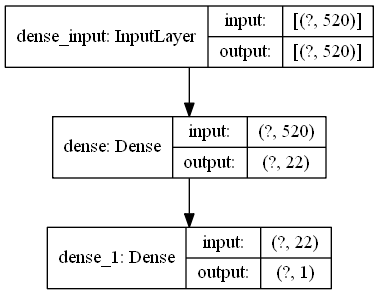

In [20]:
# plot summarize the model
plot_model(model, 'model.png', show_shapes=True)

In [21]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#sgd = SGD(learning_rate=0.01, momentum=0.8)
#model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'] )


In [22]:
# fit the model
logs = Callback()
history = model.fit(train_X, train_Y, epochs=350, batch_size=20, verbose=0, validation_split = 0.3, shuffle= True, callbacks=[logs])
#model.fit(train_X, train_Y, epochs=150, batch_size=30, verbose=0, validation_split=0.3)

In [23]:
# evaluate the model
loss, acc = model.evaluate(train_X, train_Y, verbose=0)
print('Test Accuracy: %.3f' % acc)
print('Test lost: %.3f' % loss)


Test Accuracy: 1.000
Test lost: 0.026


In [30]:
# predict probabilities for train set
ytrain_probs = model.predict(train_X, verbose=0)
# predict crisp classes for train set
ytrain_classes = model.predict_classes(train_X, verbose=0)

In [31]:
len(ytrain_probs)

104

In [32]:
ytr_probs = list()
for k in range(len(ytrain_probs)):
    ytr_probs.append(ytrain_probs[k][0])
    
#ytr_probs


In [33]:
sev=datos2b[1]
severity = list()
for k in range(len(sev)):
    if (sev[k]==0):
        severity.append("Healthy")
    else:
        if (sev[k]==1):
            severity.append("Pre-symp")
        else:
            if (sev[k]==2):
                severity.append("Sev 1")
            else:
                severity.append("Sev 2")

In [34]:
len(severity)

104

In [35]:
x=list(range(1,105))

In [36]:
df = pd.DataFrame({"Leaves":x, "Y probability":ytr_probs, 'Severity':severity})

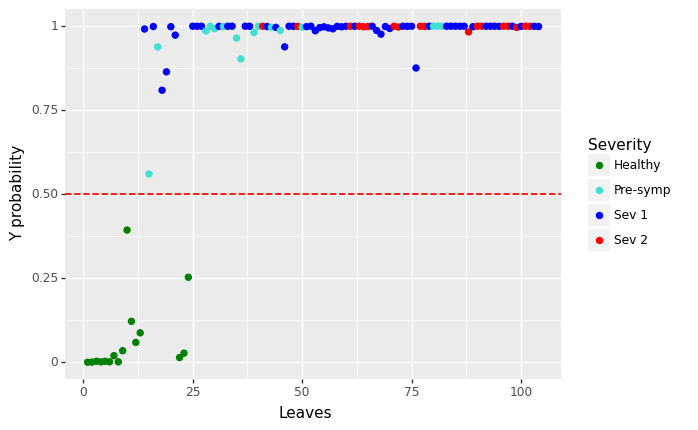

<ggplot: (68130081449)>


In [43]:
g = ggplot(df) + geom_point(aes(x="Leaves", y="Y probability", colour = 'Severity'),size=2) + \
scale_colour_manual(values=["green","turquoise","blue", "red"], limits=["Healthy", "Pre-symp", "Sev 1", "Sev 2"]) + \
geom_hline(yintercept=0.5, linetype="dashed", color = "red", size=0.7)+ guides(color = guide_legend(order=1))
print(g)

In [44]:
g.save("D:/ugarte/usal/RIP/estudio doctoral/ACADEMICO USAL/tesis/figuras/figura_ann2_prob1.png")

C:\Users\Usuario\AppData\Roaming\Python\Python37\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\Usuario\AppData\Roaming\Python\Python37\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: D:/ugarte/usal/RIP/estudio doctoral/ACADEMICO USAL/tesis/figuras/figura_ann2_prob1.png


In [48]:
print(classification_report(train_Y, ytrain_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        88

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



In [49]:
c_matrix_cv=confusion_matrix(train_Y, ytrain_classes)

In [50]:
print(c_matrix_cv)

[[16  0]
 [ 0 88]]


Text(0.5, 42.0, 'Predicted Label')

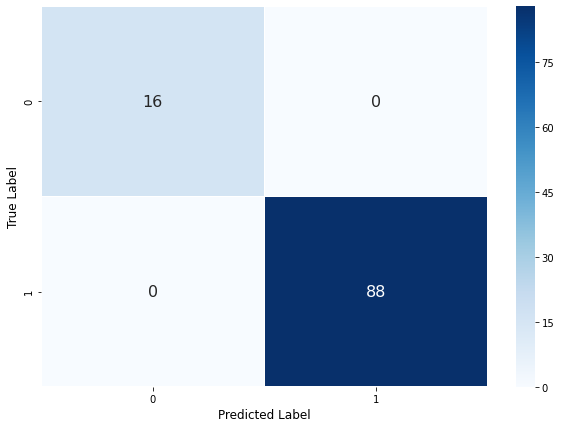

In [51]:
#plt.imshow(c_matrix_cv, cmap='binary')
#plt.matshow(c_matrix_cv)
plt.figure(figsize = (10,7))
sns.heatmap(c_matrix_cv, annot=True,annot_kws={"size": 16},linewidth = 0.5, cmap="Blues")
plt.ylabel('True Label', size = 12)
plt.xlabel('Predicted Label', size = 12)

In [52]:

np.set_printoptions(precision=2)
class_names = np.array(('healthy', 'infected'))
class_names


array(['healthy', 'infected'], dtype='<U8')

In [54]:
accuracy = accuracy_score(train_Y, ytrain_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(train_Y, ytrain_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(train_Y, ytrain_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(train_Y, ytrain_classes)
print('F1 score: %f' % f1)

Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000


### evalua dataset de prueba (validacióne xterna)

In [40]:
# evaluate the model
loss, acc = model.evaluate(test_X, test_Y, verbose=0)
print('Test Accuracy: %.3f' % acc)


Test Accuracy: 0.938


In [55]:
# predict probabilities for train set
ytest_probs = model.predict(test_X, verbose=0)
# predict crisp classes for train set
ytest_classes = model.predict_classes(test_X, verbose=0)
len(ytest_probs)

32

In [56]:
yte_probs = list()
for k in range(len(ytest_probs)):
    yte_probs.append(ytest_probs[k][0])
    
yte_probs


[5.1113995e-05,
 0.0002796865,
 0.0016905449,
 0.0019086319,
 0.0012565911,
 0.00080832816,
 0.022572692,
 0.000867914,
 0.41177318,
 0.030114686,
 0.37505212,
 0.032658663,
 0.9627966,
 0.07139269,
 0.9943006,
 0.030469304,
 0.9999957,
 0.93612987,
 0.9988875,
 0.9891432,
 0.9987966,
 0.9991627,
 0.99963653,
 0.9897254,
 0.9999949,
 0.9996679,
 0.9932197,
 0.9984555,
 0.99678123,
 0.9985764,
 0.999859,
 0.999977]

In [57]:
sev1=datos_add[1]
severity = list()
for k in range(len(sev1)):
    if (sev1[k]==0):
        severity.append("Healthy")
    else:
        if (sev1[k]==1):
            severity.append("Pre-symp")
        else:
            if (sev1[k]==2):
                severity.append("Sev 1")
            else:
                severity.append("Sev 2")
    
       
print(len(severity))
x=list(range(1,33))
x

32


[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32]

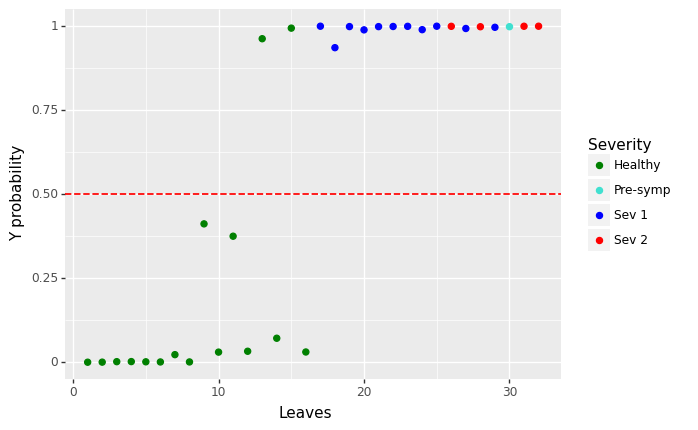

<ggplot: (68130879671)>


In [58]:
df = pd.DataFrame({"Leaves":x, "Y probability":yte_probs, 'Severity':severity})

g= ggplot(df) + geom_point(aes(x="Leaves", y="Y probability", colour = 'Severity'),size=2) + \
scale_colour_manual(values=["green","turquoise","blue", "red"], limits=["Healthy", "Pre-symp", "Sev 1", "Sev 2"]) + \
geom_hline(yintercept=0.5, linetype="dashed", color = "red", size=0.7)+ guides(color = guide_legend(order=1))
print(g)


In [64]:
df


,Leaves,Y probability,Severity
0,1,0.000051,Healthy
1,2,0.000280,Healthy
2,3,0.001691,Healthy
3,4,0.001909,Healthy
4,5,0.001257,Healthy
5,6,0.000808,Healthy
6,7,0.022573,Healthy
7,8,0.000868,Healthy
8,9,0.411773,Healthy
9,10,0.030115,Healthy


In [59]:
g.save("D:/ugarte/usal/RIP/estudio doctoral/ACADEMICO USAL/tesis/figuras/figura_ann2_prob2.png")

C:\Users\Usuario\AppData\Roaming\Python\Python37\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\Usuario\AppData\Roaming\Python\Python37\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: D:/ugarte/usal/RIP/estudio doctoral/ACADEMICO USAL/tesis/figuras/figura_ann2_prob2.png


In [60]:
print(classification_report(test_Y, ytest_classes))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.89      1.00      0.94        16

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32



In [61]:
c_matrix_ve=confusion_matrix(test_Y, ytest_classes)
print(c_matrix_ve)

[[14  2]
 [ 0 16]]


Text(0.5, 42.0, 'Predicted Label')

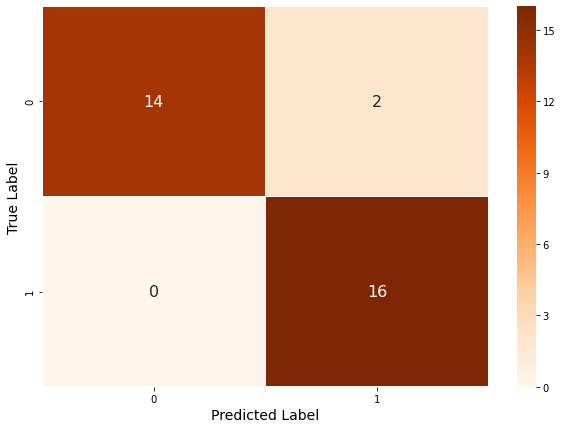

In [63]:
plt.figure(figsize = (10,7))
sns.heatmap(c_matrix_ve, annot=True,annot_kws={"size": 16},linewidth = 0.5, cmap="Oranges")
plt.ylabel('True Label', size = 14)
plt.xlabel('Predicted Label', size = 14)

In [26]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


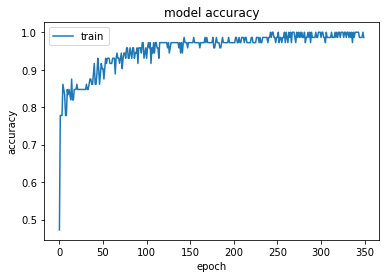

In [27]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

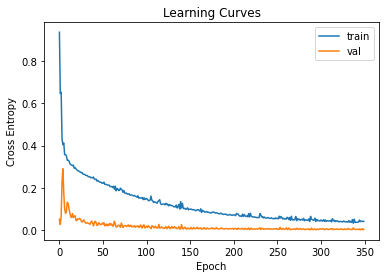

In [28]:
# plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()